In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Downloads\Datasets\Social_Network_Ads - Classification.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.shape

(400, 3)

In [4]:
X = dataset.iloc[:, [0,1]]
y = dataset.iloc[:, -1]

In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)

In [7]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
y_pred = rfc.predict(X_test)

In [11]:
X_test.shape

(80, 2)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[46,  6],
       [ 3, 25]], dtype=int64)

In [ ]:
# TP = 46
# TN = 25
# FP = 3
# FN = 6

In [13]:
accuracy_score(y_test, y_pred)

0.8875

In [22]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.88      0.91        52\n           1       0.81      0.89      0.85        28\n\n    accuracy                           0.89        80\n   macro avg       0.87      0.89      0.88        80\nweighted avg       0.89      0.89      0.89        80\n'

## AUC-ROC curve

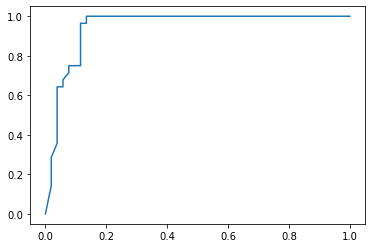

In [27]:
from sklearn import metrics
y_pred_prob = rfc.predict_proba(X_test)[::,1]
fpr, tpr, extra = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr)